# Words MNIST
## Exploraty of Data Analysis

Importing Libraries which I use.

In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

%matplotlib inline

### Exploration on Data images

First of all, Calculate counts of images by file types, including png and jpeg.

In [154]:
smpngs = [f for f in glob.glob("../input/words-mnist/dataset/v011_words_small/*.png")]
print("Total number of png files:", len(smpngs))

smjpegs = [f for f in glob.glob("../input/words-mnist/dataset/v011_words_small/*.jpeg")]
print("Total number of png files:", len(smjpegs))

print("Total samples:", len([f for f in glob.glob("../input/words-mnist/dataset/v011_words_small/*.*")]))


Total number of png files: 5039
Total number of png files: 4961
Total samples: 10000


Here, I found out each images in different resolutions.

In [156]:
first = plt.imread(smjpegs[0])
dims = np.shape(first)
print("1st sample resolution:", dims)
second = plt.imread(smjpegs[1])
dims2 = np.shape(second)
print("2nd Sample resolution:", dims2)

1st sample resolution: (37, 80, 3)
2nd Sample resolution: (28, 115, 3)


In [157]:
np.min(first), np.max(first)

(0, 255)

Let's show one of the samples.

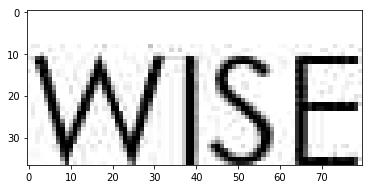

In [134]:
plt.imshow(first)

Quick look at color value histograms for pixel matrix from first image.

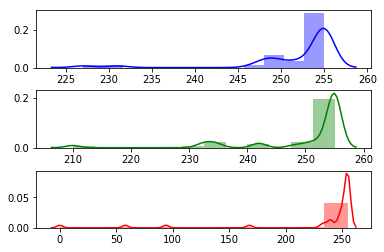

In [135]:
# quick look at color value histograms for pixel matrix from first image
import seaborn as sns

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 1, 1)
ax = sns.distplot(first[:,0], bins=12, color="blue")
ax = fig.add_subplot(3, 1, 2)
ax = sns.distplot(first[:,1], bins=12, color="green")
ax = fig.add_subplot(3, 1, 3)
ax = sns.distplot(first[:,2], bins=12, color="red")
plt.show()

### Exploration on Image labels

Importing image labels from json file

In [145]:
import ast

#pd.read_json('../input/words-mnist/v011_labels_small.json') 
with open('../input/words-mnist/v011_labels_small.json') as json_file:
    data = json.load(json_file)

df = pd.DataFrame.from_dict(data, orient="index")

arr = np.array([v for k, v in data.items()])

,0
0.jpeg,BE
1.jpeg,the
2.jpeg,TO
3.jpeg,the+
4.png,Marks
...,...
9995.jpeg,exactly
9996.png,Explain
9997.jpeg,COULD
9998.jpeg,NO


Now I will examine most frequent words, average length words and so on. But it is obvioys that stopwords would be most common words such. My aim is to do OCR recognition so I do need to asses them as well.

In [158]:
pd.value_counts(arr)[:20]

the        504
of         297
and        204
to         170
in         128
is          89
a           73
are         62
THE         59
What        58
for         58
that        55
Explain     55
his         52
(a)         49
on          48
it          45
with        44
            44
?           44
dtype: int64

Another a consideration would be the words with special characters. Even some of labels are non-letters only special characters, on previous most common words examination. Here, We will count them. 

In [170]:
import string

trans = str.maketrans('', '', string.punctuation)
spec_arr = [x for x in arr if len(x)!=len(x.translate(trans))]

print("Words containing special characters:", len(spec_arr))
print("Percentage:", int(len(spec_arr)/len(arr)*100), "%")

Words containing special characters: 1440
Percentage: 14 %


#### Word length histogram
Here, We found out most of the words length are between 1 to 5.


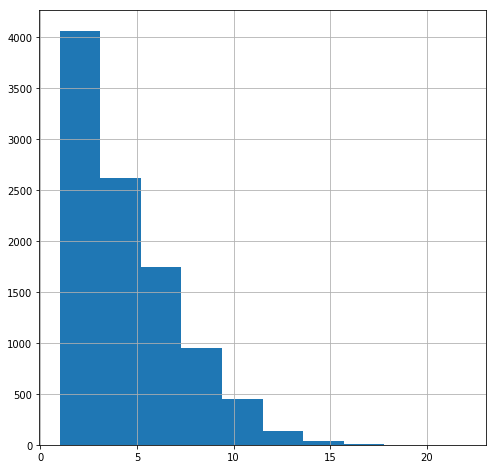

In [184]:
df[0].str.len().hist(figsize=(8,8))

Lot of words duplicated as we see.

In [186]:
df[0].nunique()

4251

Text clean, includes:

* converting all letters to lower or upper case
* converting numbers into words or removing numbers
* removing punctuations
* removing white spaces
* removing stop words


In [237]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

#text cleaning

df[0] = df[0].str.lower()
df[0] = df[0].str.replace('\d+', '')
df[0] = df[0].str.replace('[^\w\s]','')
df[0] = df[0].str.replace(' ', '')
df[0].replace('', np.nan, inplace=True)
df.dropna(inplace=True)

counter = Counter(df[0])
counter.most_common(20)

[('the', 620),
 ('of', 336),
 ('and', 252),
 ('to', 212),
 ('in', 160),
 ('a', 134),
 ('is', 99),
 ('that', 78),
 ('for', 74),
 ('what', 72),
 ('it', 71),
 ('his', 68),
 ('you', 68),
 ('are', 67),
 ('explain', 61),
 ('he', 61),
 ('or', 60),
 ('was', 59),
 ('as', 59),
 ('on', 59)]

In [234]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]

counter = Counter(remove_stopwords(df[0]))
counter.most_common(20)


['marks',
 'dogs',
 'hours',
 'courts',
 'statement',
 'asked',
 'steamboat',
 'short',
 'early',
 'mistakes',
 'oftener',
 'traveling',
 'worth',
 'price',
 'beryls',
 'theory',
 'policy',
 'way',
 'sample',
 'con',
 'told',
 'profit',
 'unloosened',
 'check',
 'whistle',
 'indicate',
 'youi',
 'emotion',
 'factors',
 'unsatisfactory',
 'nowfor',
 'obliged',
 'fill',
 'exchange',
 'capital',
 'spor',
 'job',
 'explain',
 'comfort',
 'container',
 'glorious',
 'examinations',
 'indicate',
 'protfolio',
 'c',
 'know',
 'came',
 'mean',
 'data',
 'trade',
 'parts',
 'baseless',
 'dropped',
 'kansas',
 'wouldnt',
 'smirking',
 'responsibility',
 'overhead',
 'walked',
 'outlets',
 'premises',
 'men',
 'importance',
 'history',
 'calculate',
 'overcome',
 'gray',
 'c',
 'tines',
 'gents',
 'kitchen',
 'rocks',
 'er',
 'forward',
 'tehelka',
 'random',
 'fear',
 'screen',
 'heart',
 'dollars',
 'ap',
 'hours',
 'agreements',
 'turn',
 'individual',
 'ratio',
 'hours',
 'kind',
 'interview',

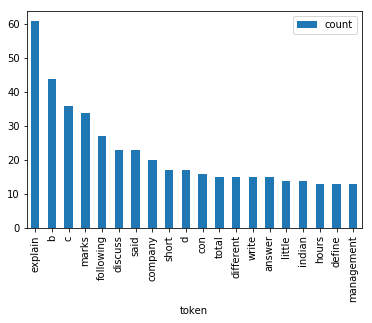

In [228]:
freq_df = pd.DataFrame.from_records(counter.most_common(20), columns=['token', 'count'])
freq_df.plot(kind='bar', x= 'token')

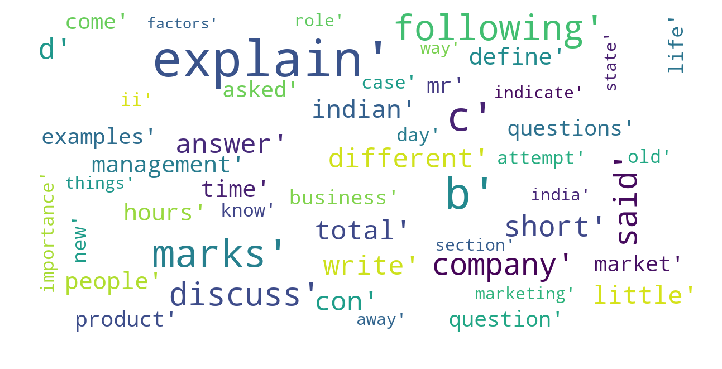

In [236]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=50,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(tokens)